In [381]:
from gensim.models import Word2Vec
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
['this', 'is', 'the', 'second', 'sentence'],
['yet', 'another', 'sentence'],
['one', 'more', 'sentence'],
['and', 'the', 'final', 'sentence']]
# train model
w2v = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)
# summarize vocabulary


CNN(
  (embedding): Embedding(173, 100)
  (convs): ModuleList(
    (0): Conv2d(1, 100, kernel_size=(3, 100), stride=(1, 1))
    (1): Conv2d(1, 100, kernel_size=(4, 100), stride=(1, 1))
    (2): Conv2d(1, 100, kernel_size=(5, 100), stride=(1, 1))
  )
  (fc): Linear(in_features=300, out_features=76, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


In [382]:
#new Ideas
"""
convert all to lower case
use word embeddings?
word2vec using network related words...
use android documentation for embeddings
"""

def splitClassNames(cls):
    cls = cls.replace(".", " ")
    #print(cls)
    return cls

In [383]:
import re

def removeCamelCase(token):
    splitted = re.sub('([A-Z][a-z]+)', r' \1', re.sub('([A-Z]+)', r' \1', token)).split()
    #print(splitted)
    finalStr = ""
    for splt in splitted:
        finalStr += splt + " "
    return finalStr



In [384]:
def createSyntheticData(df):
    counter = 40
    for index, row in df.iterrows():
        counter = 40
        while True:
            #print("inside while loop")
            if counter == 0:
                break
            df.append(row)
            counter -= 1
    return df        

In [402]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("data/mappings_cleaned.csv")

print(len(df.index))


for index, row in df.iterrows():
    #print(getattr(row, "text"))
    row["text"] = splitClassNames(row["text"])
    row["text"] = removeCamelCase(row["text"])

    row["text"] = row["text"].strip()
    #print(row["text"])

#df = pd.concat([df]*40, ignore_index=True)

df.to_csv("data/cleaned.csv", index = False)

print(len(df.index))

train, test = train_test_split(df, test_size=0.2)

print("saving data to file...")
train.to_csv("data/train.csv", index = False)
test.to_csv("data/test.csv", index = False)
print("saved")



194
194
saving data to file...
saved


{'location tags': 6, 'gps information': 5, 'address book': 1, 'application information': 1, 'application software': 2, 'application version number': 1, 'area code': 1, 'bluetooth settings': 8, 'browser language': 1, 'browser type': 2, 'calendar entries': 1, 'carrier network': 7, 'cell towers': 5, 'chat histories': 1, 'chat text': 2, 'contacts': 2, 'cookies': 1, 'country': 3, 'data': 1, 'device capability': 1, 'device characteristics': 4, 'device id': 3, 'device information': 1, 'device name': 1, 'devices hardware': 1, 'domain servers': 2, 'files': 4, 'gps': 3, 'hardware device id': 1, 'hardware information': 1, 'hardware settings': 1, 'high-level geographic information': 1, 'imei': 1, 'installed applications': 6, 'ip address': 2, 'latitude': 1, 'location': 8, 'location information': 1, 'longitude': 2, 'mcc': 3, 'mobile device id': 1, 'mobile device language setting': 4, 'mobile device type': 1, 'mobile phone model': 1, 'mobile service carrier name': 1, 'network information': 2, 'networ

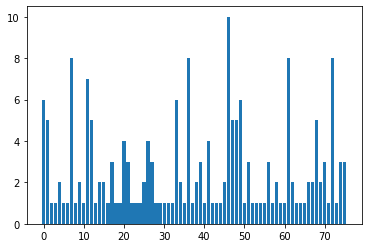

In [403]:
#stat for the data

import matplotlib.pyplot as plt

dict = {}
df.head(10) 
for index, row in df.iterrows():
    if row["labels"] in dict :
        #print("inside if")
        dict[row["labels"]] += 1
    else:
        #print("inside else")
        dict[row["labels"]] = 1
    
print(dict)


plt.bar(range(len(dict)), list(dict.values()), align='center')
#plt.xticks(range(len(dict)), list(dict.keys()))
plt.show()

In [387]:
import torch
from torchtext import data
from torchtext import datasets
import random
import numpy as np

TEXT = data.Field(tokenize = 'spacy', lower=True)
LABEL = data.LabelField()

fields=[('text', TEXT), ('labels', LABEL)]
train_data, test_data= data.TabularDataset.splits(
                                        path = 'data',
                                        train = 'cleaned.csv',
                                        test = 'test.csv',
                                        #validation = 'valid.csv',
                                        format = 'csv',
                                        fields = fields,
                                        skip_header = True
)

print(train_data[1].__dict__)


{'text': ['android', 'location', 'location', 'get', 'altitude'], 'labels': 'gps information'}


In [388]:


SEED = 1234
MAX_VOCAB_SIZE = 25000

TEXT.build_vocab(train_data, 
                 max_size = MAX_VOCAB_SIZE, 
                 vectors = "glove.6B.100d", 
                 unk_init = torch.Tensor.normal_)

LABEL.build_vocab(train_data)
print(len(test_data))
print(train_data[0].__dict__["labels"])

print(type(TEXT.vocab.vectors))
print( LABEL.vocab.stoi)

print("len of prev train data", len(train_data))

train_data, valid_data = train_data.split(random_state = random.seed(SEED))
print("len of current train and valid", len(train_data), len(valid_data))
print("length of valid data", valid_data[0].__dict__["labels"])

print(len(TEXT.vocab))

1552
location tags
<class 'torch.Tensor'>
defaultdict(None, {'network measurements': 0, 'bluetooth settings': 1, 'location': 2, 'telecommunications carrier information': 3, 'wi-fi access point information': 4, 'carrier network': 5, 'installed applications': 6, 'location tags': 7, 'operating system information': 8, 'cell towers': 9, 'gps information': 10, 'network protocol': 11, 'network type': 12, 'url': 13, 'device characteristics': 14, 'files': 15, 'mobile device language setting': 16, 'country': 17, 'device id': 18, 'gps': 19, 'mcc': 20, 'phone number': 21, 'sensors': 22, 'user information': 23, 'wifi signal strength': 24, 'zip code': 25, 'application software': 26, 'browser type': 27, 'chat text': 28, 'contacts': 29, 'domain servers': 30, 'ip address': 31, 'longitude': 32, 'network information': 33, 'sms messages': 34, 'text messages': 35, 'unique application number': 36, 'unique device id': 37, 'user content': 38, 'address book': 39, 'application information': 40, 'application ver

In [389]:
BATCH_SIZE = 64

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("device", device)
train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits(
    (train_data, valid_data, test_data), 
    batch_size = BATCH_SIZE, 
    sort_key=lambda x: len(x.text),##new added
    device = device)

print(len(TEXT.vocab))

device cpu
173


In [390]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, n_filters, filter_sizes, output_dim, 
                 dropout, pad_idx):
        
        super().__init__()
        
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        
        self.convs = nn.ModuleList([
                                    nn.Conv2d(in_channels = 1, 
                                              out_channels = n_filters, 
                                              kernel_size = (fs, embedding_dim)) 
                                    for fs in filter_sizes
                                    ])
        
        self.fc = nn.Linear(len(filter_sizes) * n_filters, output_dim)
        
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, text):
        
        #text = [sent len, batch size]
        #print("shape of text", text.shape)
        text = text.permute(1, 0)
        #print("shape of text after permute", text.shape)

        #text = [batch size, sent len]
        #print("cnn...1")
        embedded = self.embedding(text)
                
        #embedded = [batch size, sent len, emb dim]
        #print("cnn...2 size of embeded", embedded.shape)

        embedded = embedded.unsqueeze(1)
        
        #embedded = [batch size, 1, sent len, emb dim]
        #print("cnn...3")
        conved = [F.relu(conv(embedded)).squeeze(3) for conv in self.convs]
            
        #conv_n = [batch size, n_filters, sent len - filter_sizes[n]]
        #print("cnn...4")
        pooled = [F.max_pool1d(conv, conv.shape[2]).squeeze(2) for conv in conved]
        
        #pooled_n = [batch size, n_filters]
        #print("cnn...5")
        cat = self.dropout(torch.cat(pooled, dim = 1))

        #cat = [batch size, n_filters * len(filter_sizes)]
        #print("cnn...6")    
        return self.fc(cat)
    
    
"""   
class RNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, 
                 bidirectional, dropout, pad_idx):
        
        super().__init__()
        
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx = pad_idx)
        
        self.rnn = nn.LSTM(embedding_dim, 
                           hidden_dim, 
                           num_layers=n_layers, 
                           bidirectional=bidirectional, 
                           dropout=dropout)
        
        self.fc = nn.Linear(hidden_dim * 2, output_dim)
        
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, text, text_lengths):
        
        #text = [sent len, batch size]
        text = text.permute(1, 0)
        embedded = self.dropout(self.embedding(text))
        
        #embedded = [sent len, batch size, emb dim]
        
        #pack sequence
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, text_lengths)
        
        packed_output, (hidden, cell) = self.rnn(packed_embedded)
        
        #unpack sequence
        output, output_lengths = nn.utils.rnn.pad_packed_sequence(packed_output)

        #output = [sent len, batch size, hid dim * num directions]
        #output over padding tokens are zero tensors
        
        #hidden = [num layers * num directions, batch size, hid dim]
        #cell = [num layers * num directions, batch size, hid dim]
        
        #concat the final forward (hidden[-2,:,:]) and backward (hidden[-1,:,:]) hidden layers
        #and apply dropout
        
        hidden = self.dropout(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1))
                
        #hidden = [batch size, hid dim * num directions]
            
        return self.fc(hidden)"""

'   \nclass RNN(nn.Module):\n    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, \n                 bidirectional, dropout, pad_idx):\n        \n        super().__init__()\n        \n        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx = pad_idx)\n        \n        self.rnn = nn.LSTM(embedding_dim, \n                           hidden_dim, \n                           num_layers=n_layers, \n                           bidirectional=bidirectional, \n                           dropout=dropout)\n        \n        self.fc = nn.Linear(hidden_dim * 2, output_dim)\n        \n        self.dropout = nn.Dropout(dropout)\n        \n    def forward(self, text, text_lengths):\n        \n        #text = [sent len, batch size]\n        text = text.permute(1, 0)\n        embedded = self.dropout(self.embedding(text))\n        \n        #embedded = [sent len, batch size, emb dim]\n        \n        #pack sequence\n        packed_embedded = nn.utils.r

In [391]:
INPUT_DIM = len(TEXT.vocab)
print("Input dim is ", INPUT_DIM)
EMBEDDING_DIM = 100
N_FILTERS = 100
FILTER_SIZES = [3, 4, 5]
OUTPUT_DIM = len(LABEL.vocab)
print("output dim", len(LABEL.vocab))
DROPOUT = 0.5
PAD_IDX = TEXT.vocab.stoi[TEXT.pad_token]

model = CNN(INPUT_DIM, EMBEDDING_DIM, N_FILTERS, FILTER_SIZES, OUTPUT_DIM, DROPOUT, PAD_IDX)




###################
"""
INPUT_DIM = len(TEXT.vocab)
EMBEDDING_DIM = 100
HIDDEN_DIM = 256
OUTPUT_DIM = len(LABEL.vocab)
N_LAYERS = 2
BIDIRECTIONAL = True
DROPOUT = 0.5
PAD_IDX = TEXT.vocab.stoi[TEXT.pad_token]

model = RNN(INPUT_DIM, 
            EMBEDDING_DIM, 
            HIDDEN_DIM, 
            OUTPUT_DIM, 
            N_LAYERS, 
            BIDIRECTIONAL, 
            DROPOUT, 
            PAD_IDX)"""

Input dim is  173
output dim 76


'\nINPUT_DIM = len(TEXT.vocab)\nEMBEDDING_DIM = 100\nHIDDEN_DIM = 256\nOUTPUT_DIM = len(LABEL.vocab)\nN_LAYERS = 2\nBIDIRECTIONAL = True\nDROPOUT = 0.5\nPAD_IDX = TEXT.vocab.stoi[TEXT.pad_token]\n\nmodel = RNN(INPUT_DIM, \n            EMBEDDING_DIM, \n            HIDDEN_DIM, \n            OUTPUT_DIM, \n            N_LAYERS, \n            BIDIRECTIONAL, \n            DROPOUT, \n            PAD_IDX)'

In [392]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 160,476 trainable parameters


In [393]:
pretrained_embeddings = TEXT.vocab.vectors

model.embedding.weight.data.copy_(pretrained_embeddings)

tensor([[-1.4331, -0.4926, -0.6067,  ..., -0.3084,  2.8612, -1.0187],
        [-0.5537,  1.0984, -1.3618,  ..., -0.7550,  0.6795, -0.8907],
        [ 0.1269, -0.2034,  0.6303,  ..., -0.3336,  1.3511,  0.1335],
        ...,
        [ 0.1690,  0.4703,  0.2707,  ..., -0.2429,  0.1889,  0.1551],
        [-0.1491,  0.2022,  0.2954,  ...,  0.3309,  0.8980, -0.2173],
        [-0.2689,  0.4596,  0.9803,  ..., -0.2974,  0.9624, -0.3738]])

In [394]:
UNK_IDX = TEXT.vocab.stoi[TEXT.unk_token]

model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)

In [395]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters(), lr = 0.0001)

criterion = nn.CrossEntropyLoss()
#criterion = nn.CosineSimilarity()
#this line added newly
#criterion = nn.HingeEmbeddingLoss()
model = model.to(device)
criterion = criterion.to(device)

In [396]:

    
    
def categorical_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """
    max_preds = preds.argmax(dim = 1, keepdim = True) # get the index of the max probability
    correct = max_preds.squeeze(1).eq(y)
    return correct.sum() / torch.FloatTensor([y.shape[0]])

In [397]:
def train(model, iterator, optimizer, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    #print("len of iterator in train", len(iterator))
    for batch in iterator:
        
        optimizer.zero_grad()

        predictions = model(batch.text)
        
        loss = criterion(predictions, batch.labels)
                    
        acc = categorical_accuracy(predictions, batch.labels)
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)




In [398]:
def evaluate(model, iterator, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    
    with torch.no_grad():
        #print("len of iterator", len(iterator))
        for batch in iterator:
            try:
                #print("text ", batch.text.stoi, "label ", batch.labels)
                
                predictions = model(batch.text)

                loss = criterion(predictions, batch.labels)

                acc = categorical_accuracy(predictions, batch.labels)

                epoch_loss += loss.item()
                epoch_acc += acc.item()
            except Exception as e:
                print("found exception")


    
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [399]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [400]:
N_EPOCHS = 25

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):

    start_time = time.time()
    #print("before train...1")
    
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    #print("train done")
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
    
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
        
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut5-model.pt')
    
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    #print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

Epoch: 01 | Epoch Time: 0m 2s
	Train Loss: 3.957 | Train Acc: 13.82%
Epoch: 02 | Epoch Time: 0m 2s
	Train Loss: 3.306 | Train Acc: 30.09%
Epoch: 03 | Epoch Time: 0m 2s
	Train Loss: 2.802 | Train Acc: 41.57%
Epoch: 04 | Epoch Time: 0m 2s
	Train Loss: 2.346 | Train Acc: 48.66%
Epoch: 05 | Epoch Time: 0m 2s
	Train Loss: 1.981 | Train Acc: 51.99%
Epoch: 06 | Epoch Time: 0m 2s
	Train Loss: 1.688 | Train Acc: 55.15%
Epoch: 07 | Epoch Time: 0m 2s
	Train Loss: 1.463 | Train Acc: 57.87%
Epoch: 08 | Epoch Time: 0m 2s
	Train Loss: 1.290 | Train Acc: 59.80%
Epoch: 09 | Epoch Time: 0m 2s
	Train Loss: 1.165 | Train Acc: 61.52%
Epoch: 10 | Epoch Time: 0m 2s
	Train Loss: 1.051 | Train Acc: 63.62%
Epoch: 11 | Epoch Time: 0m 2s
	Train Loss: 0.973 | Train Acc: 64.51%
Epoch: 12 | Epoch Time: 0m 2s
	Train Loss: 0.911 | Train Acc: 65.54%
Epoch: 13 | Epoch Time: 0m 2s
	Train Loss: 0.875 | Train Acc: 65.18%
Epoch: 14 | Epoch Time: 0m 2s
	Train Loss: 0.836 | Train Acc: 65.63%
Epoch: 15 | Epoch Time: 0m 2s
	Tra

In [401]:
model.load_state_dict(torch.load('tut5-model.pt'))

test_loss, test_acc = evaluate(model, valid_iterator, criterion)

print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

Test Loss: 0.716 | Test Acc: 67.53%


In [348]:
import spacy
nlp = spacy.load('en')

def predict_class(model, sentence, min_len = 4):
    model.eval()
    tokenized = [tok.text for tok in nlp.tokenizer(sentence)]
    if len(tokenized) < min_len:
        tokenized += ['<pad>'] * (min_len - len(tokenized))
    indexed = [TEXT.vocab.stoi[t] for t in tokenized]
    tensor = torch.LongTensor(indexed).to(device)
    tensor = tensor.unsqueeze(1)
    preds = model(tensor)
    max_preds = preds.argmax(dim = 1)
    return max_preds.item()

In [349]:
pred_class = predict_class(model, removeCamelCase("android telephony Telephony Manager get Device Id"))
print(f'Predicted class is: {pred_class} = {LABEL.vocab.itos[pred_class]}')

Predicted class is: 7 = location tags


In [59]:
print(f'Predicted class is: {pred_class} = {LABEL.vocab.stoi}')

Predicted class is: 0 = defaultdict(None, {'network measurements': 0, 'bluetooth settings': 1, 'location': 2, 'telecommunications carrier information': 3, 'wi-fi access point information': 4, 'carrier network': 5, 'installed applications': 6, 'location tags': 7, 'operating system information': 8, 'cell towers': 9, 'gps information': 10, 'network protocol': 11, 'network type': 12, 'url': 13, 'device characteristics': 14, 'files': 15, 'mobile device language setting': 16, 'country': 17, 'device id': 18, 'gps': 19, 'mcc': 20, 'phone number': 21, 'sensors': 22, 'user information': 23, 'wifi signal strength': 24, 'zip code': 25, 'application software': 26, 'browser type': 27, 'chat text': 28, 'contacts': 29, 'domain servers': 30, 'ip address': 31, 'longitude': 32, 'network information': 33, 'sms messages': 34, 'text messages': 35, 'unique application number': 36, 'unique device id': 37, 'user content': 38, 'address book': 39, 'application information': 40, 'application version number': 41, 